In [23]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from helpers import get_train_test ,get_class_ratios, RANDOM_STATE
from helpers import classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from helpers import XGBoostModel


# Testing various models with processes Dataset

We will independently test the following models, with processed dataset from our Type 1 Preprocessing and Type 2 Preprocessing respectively.

Models to be tested are:

1. Logistic Regression
2. Support Vector Machine
3. Decision Tree Classifier (Ensemble)
4. Random Forest Classifier
5. Naive Bayes Classifier
6. XGBoost Classifier

In [12]:
## Extracting Data from Processed Dataset
df_1 = pd.read_csv('../dataset/processed_dataset/final_data_S1.csv')
df_2 = pd.read_csv('../dataset/processed_dataset/final_data_S2.csv')

X1_train, X1_test, y1_train, y1_test = get_train_test(df_1)
X2_train, X2_test, y2_train, y2_test = get_train_test(df_2)

<AxesSubplot:title={'center':'Train and Test class ratio for Dataset-2'}>

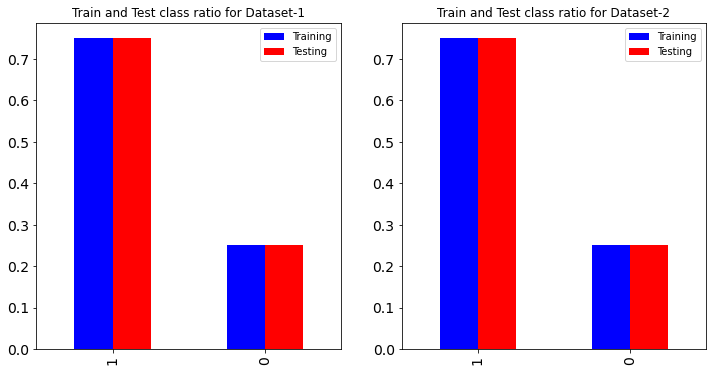

In [13]:
figure,ax = plt.subplots(1,2,figsize=(12,6), gridspec_kw={'wspace':0.2})
get_class_ratios(y1_train,y1_test).plot(
    kind='bar',ax=ax[0],title='Train and Test class ratio for Dataset-1', legend=True, color=['blue','red'], fontsize=14
)
get_class_ratios(y2_train,y2_test).plot(
    kind='bar',ax=ax[1],title='Train and Test class ratio for Dataset-2', legend=True, color=['blue','red'], fontsize=14
)

We can see distribution of 75:25 , for both the datasets. This shows imbalance in the data, and will consider measures in models like weighting, balancing, etc.

## Logistic Regression

Let's test the Logistic Regression model with processed dataset.

We are using **[SKLearn- Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)** library for this. All the hyper-parameters are tested through GridSearch with parallel processing.

### Type 1 Dataset

In [14]:
lr1_model = LogisticRegression(
    C=0.1 ,
    l1_ratio = 0.4 ,
    penalty='elasticnet' ,
    solver='saga' ,
    tol=0.12 ,
    max_iter=1000,
    class_weight='balanced',
    random_state=RANDOM_STATE
).fit(X1_train, y1_train)

prediction = lr1_model.predict(X1_test)

              precision    recall  f1-score   support

           0       0.65      0.50      0.57        34
           1       0.85      0.91      0.88       102

    accuracy                           0.81       136
   macro avg       0.75      0.71      0.72       136
weighted avg       0.80      0.81      0.80       136

         auc                           0.71 



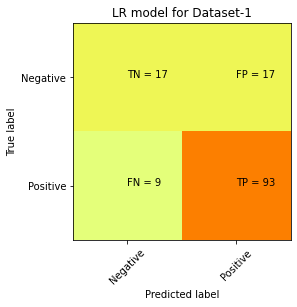

In [15]:
print(classification_report(y1_test,prediction))
confusion_matrix(y1_test,prediction,"LR model for Dataset-1")

We can see average F1 score of **0.8 (or 80%)**, with average Recall and Precision of **0.80** and **0.81** respectively.

From **Confusion matrix** , we can see our model is having difficulty on classifying **Negative Examples** (i.e Higher FP). This may be cause of Inbalanced Dataset.

### Type 2 Dataset

In [17]:
lr2_model = LogisticRegression(
    C=0.45 ,
    penalty='l2' ,
    solver='saga' ,
    tol=0.125 ,
    max_iter=1000,
    class_weight='balanced',
    random_state=RANDOM_STATE
).fit(X2_train, y2_train)

prediction = lr2_model.predict(X2_test)


              precision    recall  f1-score   support

           0       0.51      0.68      0.58        34
           1       0.88      0.78      0.83       102

    accuracy                           0.76       136
   macro avg       0.70      0.73      0.71       136
weighted avg       0.79      0.76      0.77       136

         auc                           0.73 



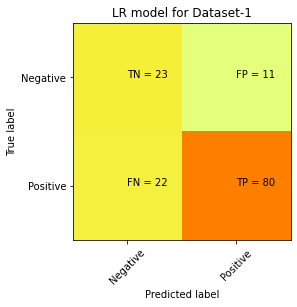

In [18]:
print(classification_report(y2_test,prediction))
confusion_matrix(y2_test,prediction,"LR model for Dataset-2")

We can see average F1 score of **0.77 (or 77%)**, with average Recall and Precision of **0.86** and **0.79** respectively.

From **Confusion matrix** , we can see our model is having difficulty on classifying **Negative Examples** (i.e Higher FP). This model slightly worse than our LR1 model.

---

## Simple Vector Machine (SVM)

Let's test the SVM model with processed dataset.

We are using **[SKLearn- SVM](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm)** library for this. All the hyper-parameters are tested through GridSearch with parallel processing.

### Type 1 Dataset

In [19]:
svm1_model = SVC(
    C=1.1,
    coef0=0,
    degree=8,
    gamma='scale',
    kernel='rbf',
    tol=0.47,
    class_weight='balanced',
    random_state=RANDOM_STATE
).fit(X1_train, y1_train)

prediction = svm1_model.predict(X1_test)

              precision    recall  f1-score   support

           0       0.65      0.76      0.70        34
           1       0.92      0.86      0.89       102

    accuracy                           0.84       136
   macro avg       0.78      0.81      0.80       136
weighted avg       0.85      0.84      0.84       136

         auc                           0.81 



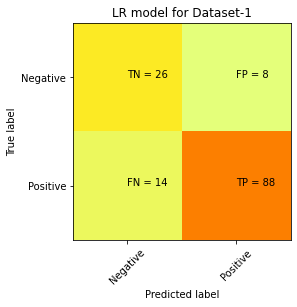

In [20]:
print(classification_report(y1_test,prediction))
confusion_matrix(y1_test,prediction,"SVM model for Dataset-1")

We can see average F1 score of **0.84 (or 84%)**, with average Recall and Precision of **0.85** and **0.84** respectively.

Confusion matrix show nearly fair distribution of the data.

### Type 2 Dataset

In [21]:
svm2_model = SVC(
    C=2.4,
    coef0=0.06,
    degree=7,
    gamma='scale',
    kernel='rbf',
    tol=0.38,
    class_weight='balanced',
    random_state=RANDOM_STATE
).fit(X2_train, y2_train)

prediction = svm2_model.predict(X2_test)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        34
           1       0.92      0.95      0.93       102

    accuracy                           0.90       136
   macro avg       0.87      0.84      0.86       136
weighted avg       0.89      0.90      0.89       136

         auc                           0.84 



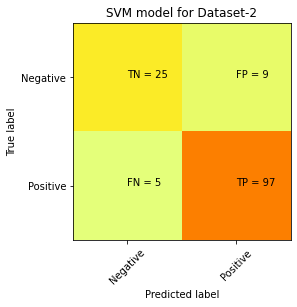

In [22]:
print(classification_report(y2_test,prediction))
confusion_matrix(y2_test,prediction,"SVM model for Dataset-2")

We can see average F1 score of **0.89 (or 89%)**, with average Recall and Precision of **0.90** and **0.89** respectively.

From **Confusion matrix** , we can see model svm2 is far better than svm1 on classifying both classes.

---

## Xtrem Gradient Boosting (XGBoost)

Let's test the XGBoost model with processed dataset.

We are using **[XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_api.html)** library for this. All the hyper-parameters are tested through GridSearch with parallel processing.

### Type 1 Dataset

In [27]:
params = {
    'booster': 'gbtree', 'colsample_bylevel': 0.5, 'colsample_bynode': 0.5, 'colsample_bytree': 0.8, 'gamma': 0.2, 'grow_policy': 'depthwise','learning_rate': 0.6,
    'max_delta_step': 0.41, 'max_depth': 5, 'min_child_weight': 0.42, 'num_parallel_tree': 1, 'reg_alpha': 0.1, 'reg_lambda': 0.45,'subsample': 0.8, 'tree_method': 'exact'
}
xgb1_model = XGBoostModel( **params )
xgb1_model.fit(X1_train,y1_train, X1_test, y1_test, verbose=False)

prediction = xgb1_model.predict(X1_test)

Training XGBoost model...


              precision    recall  f1-score   support

           0       0.89      0.74      0.81        34
           1       0.92      0.97      0.94       102

    accuracy                           0.91       136
   macro avg       0.90      0.85      0.87       136
weighted avg       0.91      0.91      0.91       136

         auc                           0.85 



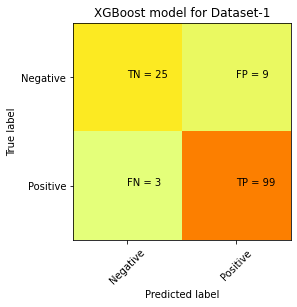

In [28]:
print(classification_report(y1_test,prediction))
confusion_matrix(y1_test,prediction,"XGBoost model for Dataset-1")

We can see average F1 score of **0.91 (or 91%)**, with average Recall and Precision of **0.91** and **0.91** respectively.

From **Confusion matrix** , we can see this model is by far best model.

### Type 2 Dataset

In [29]:
params = {
    'booster': 'gbtree', 'colsample_bylevel': 0.5, 'colsample_bynode': 0.5, 'colsample_bytree': 0.8, 'gamma': 0.2, 'grow_policy': 'depthwise', 'learning_rate': 0.7,
    'max_delta_step': 0.41, 'max_depth': 8, 'min_child_weight': 0.42, 'num_parallel_tree': 1, 'reg_alpha': 2.3, 'reg_lambda': 2.3, 'subsample': 0.8, 'tree_method': 'exact'
}
xgb2_model = XGBoostModel( **params )
xgb2_model.fit(X2_train,y2_train, X2_test, y2_test, verbose=False)

prediction = xgb2_model.predict(X2_test)

Training XGBoost model...


              precision    recall  f1-score   support

           0       0.80      0.71      0.75        34
           1       0.91      0.94      0.92       102

    accuracy                           0.88       136
   macro avg       0.85      0.82      0.84       136
weighted avg       0.88      0.88      0.88       136

         auc                           0.82 



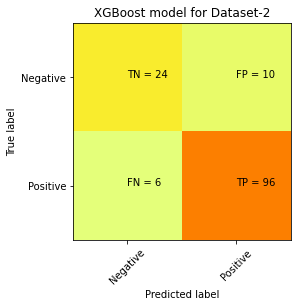

In [30]:
print(classification_report(y1_test,prediction))
confusion_matrix(y1_test,prediction,"XGBoost model for Dataset-2")

We can see average F1 score of **0.88 (or 88%)**, with average Recall and Precision of **0.88** and **0.88** respectively.

From **Confusion matrix** , we can see this model is slightly worse than our XGB1 model, but better than other model till now.

---